<a href="https://colab.research.google.com/github/Somya000/Data-Science/blob/main/Stock_Market_Analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import pandas_datareader as web
from pandas_datareader import data
from pandas.io.formats.style_render import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Dense,LSTM,Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
dataset = files.upload()

Saving SBIN.csv to SBIN.csv


In [ ]:
#Store the data into data Frame
df=pd.read_csv('SBIN.csv')
df.head(10)

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,1995-05-05,177.0,178.0,174.0,175.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,-2.0
1,1995-05-08,172.0,174.0,172.0,172.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
2,1995-05-09,174.0,174.0,170.0,172.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,-2.0
3,1995-05-10,171.0,172.0,170.0,171.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
4,1995-05-12,169.0,171.0,167.0,171.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,2.0
5,1995-05-15,170.0,172.0,170.0,171.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0
6,1995-05-16,170.0,172.5,170.0,172.0,0.0,0.0,0.0,0.0,NaN,NaN,2.5,2.0
7,1995-05-17,173.5,174.5,172.5,172.5,0.0,0.0,0.0,0.0,NaN,NaN,2.0,-1.0
8,1995-05-18,174.0,179.0,174.0,178.0,0.0,0.0,0.0,0.0,NaN,NaN,5.0,4.0
9,1995-05-19,181.0,181.5,177.0,179.0,0.0,0.0,0.0,0.0,NaN,NaN,4.5,-2.0


In [ ]:
df.shape

(6009, 13)

In [ ]:
df = df['Close'].values
df = df.reshape(-1, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.01028665],
       [0.00939086],
       [0.00939086],
       [0.00909227],
       [0.00909227]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.66819946],
       [0.68747387],
       [0.68884742],
       [0.68730964],
       [0.6815318 ]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
149/149 [==============================] - 36s 183ms/step - loss: 0.0061
Epoch 2/50
149/149 [==============================] - 28s 185ms/step - loss: 0.0016
Epoch 3/50
149/149 [==============================] - 30s 204ms/step - loss: 0.0016
Epoch 4/50
149/149 [==============================] - 30s 199ms/step - loss: 0.0016
Epoch 5/50
149/149 [==============================] - 27s 179ms/step - loss: 0.0015
Epoch 6/50
149/149 [==============================] - 28s 185ms/step - loss: 0.0012
Epoch 7/50
149/149 [==============================] - 29s 197ms/step - loss: 0.0012
Epoch 8/50
149/149 [==============================] - 27s 178ms/step - loss: 0.0010
Epoch 9/50
149/149 [==============================] - 26s 176ms/step - loss: 9.8727e-04
Epoch 10/50
149/149 [==============================] - 27s 179ms/step - loss: 0.0010
Epoch 11/50
149/149 [==============================] - 28s 189ms/step - loss: 8.9287e-04
Epoch 12/50
149/149 [==============================] - 26s 177ms/s

In [ ]:
model = load_model('stock_prediction.h5')

36/36 [==============================] - 4s 62ms/step


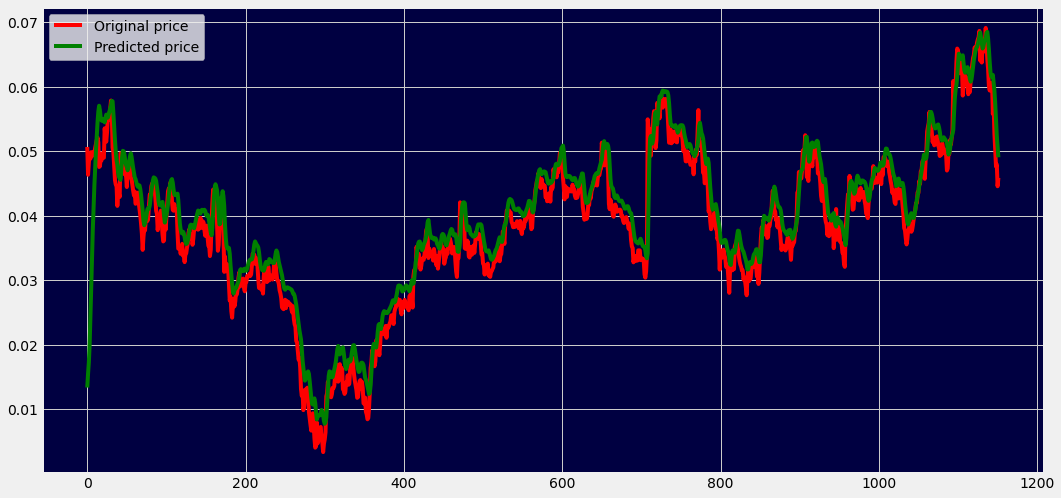

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='Green', label='Predicted price')
plt.legend()